In [61]:
# !pip install country_converter
# data
import pandas as pd
import numpy as np
import country_converter as coco
from IPython.display import HTML # 导入HTML
# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

# nltk
import nltk
from xgboost import plot_tree
# styling
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')


<ipython-input-61-f2ca7698ed73>:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [92]:
dict_path="E:/数据挖掘/数维杯/2022“ShuWei Cup”_Problem/2022“ShuWei Cup”_Problem/2022_“ShuWei Cup”C_Problem/problem3"
data_path=dict_path+"/data"
img_path=dict_path+"/img"

In [93]:
data=pd.read_csv(data_path+"/ADNIMERGE_New.csv",low_memory=False)
data.head(10)

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,PIB,AV45,FBB,ABETA,TAU,PTAU,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,DIGITSCOR,TRABSCOR,FAQ,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,FLDSTRENG,FSVERSION,IMAGEUID,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX,mPACCdigit,mPACCtrailsB,EXAMDATE_bl,CDRSB_bl,ADAS11_bl,ADAS13_bl,ADASQ4_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,LDELTOTAL_BL,DIGITSCOR_bl,TRABSCOR_bl,FAQ_bl,mPACCdigit_bl,mPACCtrailsB_bl,FLDSTRENG_bl,FSVERSION_bl,IMAGEUID_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtMem_bl,EcogPtLang_bl,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPMem_bl,EcogSPLang_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-9-8,CN,74.3,Male,16,Not Hisp/Latino,White,Married,0.0,1.33615,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35475.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,CN,-4.31670,-4.11991,2005-9-8,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,-4.31670,-4.11991,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35475.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,58:48.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-9-12,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.10860,NaN,NaN,NaN,741.5,239.7,22.83,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,Dementia,-16.29050,-15.87370,2005-9-12,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-16.29050,-15.87370,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.5,239.7,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,58:48.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-3-13,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.07796,NaN,NaN,NaN,NaN,NaN,NaN,6.0,19.00,30.00,10.0,24.0,19.0,2.0,6.0,100.0000,NaN,19.0,135.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,31863.0,88580.0,5446.0,1100060.0,2427.0,14400.0,16972.0,1906430.0,Dementia,-14.80130,-13.16990,2005-9-12,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-16.29050,-15.87370,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.5,239.7,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,58:48.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-9-12,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.11626,NaN,NaN,NaN,601.4,251.7,24.18,3.5,24.00,35.00,10.0,17.0,31.0,2.0,7.0,100.0000,0.0,21.0,126.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35576.0,90099.0,5157.0,1095640.0,1596.0,14617.0,17330.0,1903820.0,Dementia,-21.02930,-19.83780,2005-9-12,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16222 entries, 0 to 16221
Columns: 116 entries, RID to update_stamp
dtypes: float64(88), int64(5), object(23)
memory usage: 14.4+ MB


In [65]:
data.describe()

,RID,SITE,AGE,PTEDUCAT,APOE4,FDG,PIB,AV45,FBB,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,DIGITSCOR,TRABSCOR,FAQ,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,IMAGEUID,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,mPACCdigit,mPACCtrailsB,CDRSB_bl,ADAS11_bl,ADAS13_bl,ADASQ4_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,LDELTOTAL_BL,DIGITSCOR_bl,TRABSCOR_bl,FAQ_bl,mPACCdigit_bl,mPACCtrailsB_bl,IMAGEUID_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtMem_bl,EcogPtLang_bl,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPMem_bl,EcogSPLang_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M
count,16222.000000,16222.000000,16213.000000,16222.000000,15907.000000,3693.000000,223.000000,3080.000000,514.000000,11634.000000,11343.000000,11244.000000,11378.000000,11382.000000,11258.000000,11259.000000,11227.000000,11154.000000,9353.000000,3800.000000,10929.000000,11627.000000,7343.000000,7667.000000,7651.000000,7572.000000,7633.000000,7494.000000,7595.000000,7658.000000,7700.000000,7706.000000,7528.000000,7617.000000,7375.000000,7502.000000,7698.000000,9.934000e+03,9343.000000,8681.000000,9.596000e+03,8268.000000,8268.000000,8268.000000,9.928000e+03,11384.000000,11390.000000,16222.000000,16186.000000,16114.000000,16216.000000,16221.000000,16182.000000,16182.000000,16180.000000,16159.000000,16218.000000,7235.000000,15956.000000,16135.000000,16220.000000,16220.000000,1.594000e+04,15450.000000,14067.000000,1.574000e+04,13909.000000,13909.000000,13909.000000,1.593900e+04,8820.000000,8931.000000,8923.000000,8892.000000,8932.000000,8750.000000,8877.000000,8933.000000,8897.000000,8907.000000,8779.000000,8845.000000,8502.000000,8729.000000,8898.000000,11127.000000,154.000000,7729.000000,1048.000000,16222.000000,16222.000000,16222.000000,16222.000000
mean,2866.047343,81.490692,73.250786,16.104981,0.517131,1.175624,1.783161,1.193030,1.174792,2.044482,10.875484,16.734815,5.042802,26.793007,35.688488,4.219202,4.154984,56.699236,8.790335,37.388947,116.713588,5.189645,23.378456,2.048923,1.719095,1.391392,1.410016,1.525360,1.825379,1.675451,2.089963,1.687082,1.570110,1.669233,1.741074,1.954657,1.789581,4.132406e+05,41959.619458,6768.982110,1.015640e+06,3548.929850,17364.170900,19440.530963,1.522802e+06,-5.825108,-5.489890,1.220072,9.272159,14.637150,4.692649,27.750570,37.700037,4.646892,4.239988,52.649921,8.230546,40.323842,107.415016,2.984568,-4.564382,-4.298607,2.752552e+05,38033.318233,6985.419919,1.030741e+06,3641.347976,17676.430800,19935.902222,1.527300e+06,23.857256,2.058554,1.698961,1.355591,1.376773,1.480347,1.781110,1.648044,1.937536,1.519010,1.368644,1.471181,1.556401,1.738420,1.604383,1.226403,1.582256,1.187312,1.163628,2.695076,32.274644,32.193688,32.059980
std,2205.254476,132.050554,7.011759,2.766438,0.647568,0.167288,0.422511,0.230866,0.246077,2.860615,8.394992,11.483525,3.115064,3.878779,13.829854,2.837911,2.758760,44.780539,6.198128,14.417652,76.468296,7.815109,4.672629,0.743302,0.646796,0.553416,0.567195,0.634548,0.767050,0.558405,0.994152,0.828625,0.845545,0.909208,0.965987,1.004475,0.851115,3.837793e+05,23045.140409,1227.116566,1.111479e+05,846.120325,2798.142475,3115.894727,1.707792e+05,8.062666,7.670474,1.520190,5.786148,8.607205,2.842132,2.350733,12.265878,2.731007,2.612014,34.917451,5.286308,12.403970,65.969985,5.258527,5.695489,5.411334,2.954513e+05,21473.907341,1152.848757,1.094089e+05,783.515496,2662.218788,2984.460980,1.675721e+05,3.906976,0.723084,0.621239,0.521029,0.537481,0.603592,0.740498,0.530808,0.878610,0.676976,0.620668,0.708422,0.792806,0.862778,0.671764,0.153262,0.302114,0.220179,0.237175,2.8

In [66]:
pd.Series(data['DX_bl']).value_counts()

LMCI    5236
CN      4850
EMCI    2968
AD      1738
SMC     1416
Name: DX_bl, dtype: int64

In [67]:
DX_bl_dict={
    "LMCI":2,
    "CN":1,
    "EMCI":2,
    "AD":3,
    "SMC":2
}

In [68]:
data["DX_bl"]=data["DX_bl"].map(DX_bl_dict)

In [94]:
data1=data.fillna(0)
data1.head()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,PIB,AV45,FBB,ABETA,TAU,PTAU,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,DIGITSCOR,TRABSCOR,FAQ,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,FLDSTRENG,FSVERSION,IMAGEUID,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX,mPACCdigit,mPACCtrailsB,EXAMDATE_bl,CDRSB_bl,ADAS11_bl,ADAS13_bl,ADASQ4_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,LDELTOTAL_BL,DIGITSCOR_bl,TRABSCOR_bl,FAQ_bl,mPACCdigit_bl,mPACCtrailsB_bl,FLDSTRENG_bl,FSVERSION_bl,IMAGEUID_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtMem_bl,EcogPtLang_bl,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPMem_bl,EcogSPLang_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-9-8,CN,74.3,Male,16,Not Hisp/Latino,White,Married,0.0,1.33615,0.0,0.0,0.0,0,0,0,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35475.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,CN,-4.3167,-4.11991,2005-9-8,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,-4.3167,-4.11991,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35475.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1.33615,0.0,0.0,0.0,0.000000,0.00000,0,0,58:48.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-9-12,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.10860,0.0,0.0,0.0,741.5,239.7,22.83,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,Dementia,-16.2905,-15.87370,2005-9-12,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-16.2905,-15.87370,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,741.5,239.7,22.83,1.10860,0.0,0.0,0.0,0.000000,0.00000,0,0,58:48.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-3-13,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.07796,0.0,0.0,0.0,0,0,0,6.0,19.00,30.00,10.0,24.0,19.0,2.0,6.0,100.0000,0.0,19.0,135.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,31863.0,88580.0,5446.0,1100060.0,2427.0,14400.0,16972.0,1906430.0,Dementia,-14.8013,-13.16990,2005-9-12,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-16.2905,-15.87370,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,741.5,239.7,22.83,1.10860,0.0,0.0,0.0,0.498289,5.96721,6,6,58:48.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-9-12,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.11626,0.0,0.0,0.0,601.4,251.7,24.18,3.5,24.00,35.00,10.0,17.0,31.0,2.0,7.0,100.0000,0.0,21.0,126.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35576.0,90099.0,5157.0,1095640.0,1596.0,14617.0,17330.0,1903820.0,Dementia,-21.0293,-19.83780,2005-9-12,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-16.2905,-15.87370,1.5 Tes

In [70]:
data1=data1.select_dtypes(exclude="object")
data1

,RID,SITE,DX_bl,AGE,PTEDUCAT,APOE4,FDG,PIB,AV45,FBB,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,DIGITSCOR,TRABSCOR,FAQ,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,IMAGEUID,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,mPACCdigit,mPACCtrailsB,CDRSB_bl,ADAS11_bl,ADAS13_bl,ADASQ4_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,LDELTOTAL_BL,DIGITSCOR_bl,TRABSCOR_bl,FAQ_bl,mPACCdigit_bl,mPACCtrailsB_bl,IMAGEUID_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtMem_bl,EcogPtLang_bl,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPMem_bl,EcogSPLang_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M
0,2,11,1.0,74.3,16,0.0,1.33615,0.0,0.0,0.0,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,0.0,0.000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00,0.0,0.0,0.0,0.0,0.00,0.00000,35475.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,-4.316700,-4.119910,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,-4.31670,-4.11991,35475.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,0.0,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,1.33615,0.0,0.0000,0.0000,0.000000,0.00000,0,0
1,3,11,3.0,81.3,18,1.0,1.10860,0.0,0.0,0.0,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,0.0,0.000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00,0.0,0.0,0.0,0.0,0.00,0.00000,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,-16.290500,-15.873700,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-16.29050,-15.87370,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,0.0,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,1.10860,0.0,0.0000,0.0000,0.000000,0.00000,0,0
2,3,11,3.0,81.3,18,1.0,1.07796,0.0,0.0,0.0,6.0,19.00,30.00,10.0,24.0,19.0,2.0,6.0,100.0000,0.0,19.0,135.0,12.0,0.0,0.000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00,0.0,0.0,0.0,0.0,0.00,0.00000,31863.0,88580.0,5446.0,1100060.0,2427.0,14400.0,16972.0,1906430.0,-14.801300,-13.169900,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-16.29050,-15.87370,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,0.0,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,1.10860,0.0,0.0000,0.0000,0.498289,5.96721,6,6
3,3,11,3.0,81.3,18,1.0,1.11626,0.0,0.0,0.0,3.5,24.00,35.00,10.0,17.0,31.0,2.0,7.0,100.0000,0.0,21.0,126.0,17.0,0.0,0.000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00,0.0,0.0,0.0,0.0,0.00,0.00000,35576.0,90099.0,5157.0,1095640.0,1596.0,14617.0,17330.0,1903820.0,-21.029300,-19.837800,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-16.29050,-15.87370,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,0.0,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,1.10860,0.0,0.0000,0.0000,0.999316,11.96720,12,12
4,3,11,3.0,81.3,18,1.0,1.06134,0.0,0.0,0.0,8.0,25.67,37.67,10.0,19.0,23.0,1.0,5.0,100.0000,0.0,16.0,275.0,14.0,0.0,0.000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00,0.0,0.0,0.0,0.0,0.00,0.00000,88252.0,97420.0,5139.0,1088560.0,1175.0,14033.0,16398.0,1903420.0,-19.764000,-19.941000,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-16.29050,-15.87370,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,0.0,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,1.10860,0.0,0.0000,0.0000,1.998630,23.93440,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [71]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

## 选择其类别为0和1的样本 （不包括类别为2的样本）
data_target_part = data1['DX_bl']
data_features_part = data1[[x for x in data1.columns if x != 'DX_bl']]

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(data_features_part, data_target_part, test_size = 0.2, random_state = 2020)


In [72]:
## 导入XGBoost模型
from xgboost.sklearn import XGBClassifier
## 定义 XGBoost模型 
clf = XGBClassifier()
# 在训练集上训练XGBoost模型
clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

The accuracy of the Logistic Regression is(train): 1.0
The accuracy of the Logistic Regression is:(test) 0.9959938366718027
The confusion matrix result:
 [[   0    0    0    0]
 [   0  967    1    0]
 [   3    4 1920    5]
 [   0    0    0  345]]


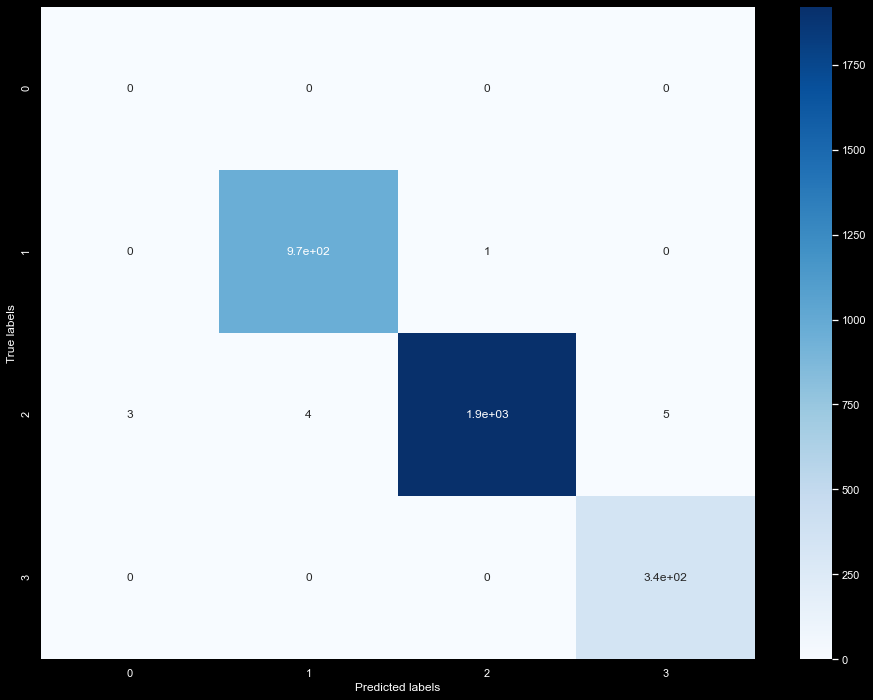

In [73]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is(train):',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:(test)',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()



初次之外，我们还可以使用XGBoost中的下列重要属性来评估特征的重要性。

weight:是以特征用到的次数来评价
gain:当利用特征做划分的时候的评价基尼指数
cover:利用一个覆盖样本的指标二阶导数（具体原理不清楚有待探究）平均值来划分。
total_gain:总基尼指数
total_cover:总覆盖

<Figure size 1080x3240 with 0 Axes>

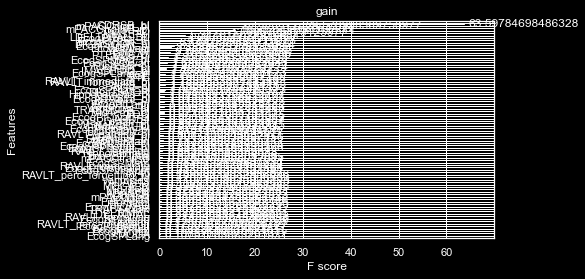

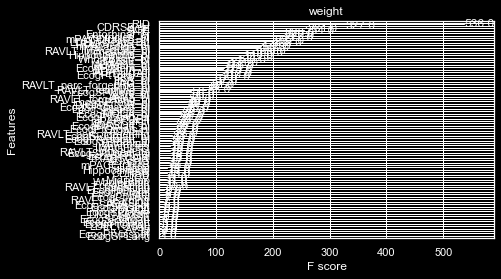

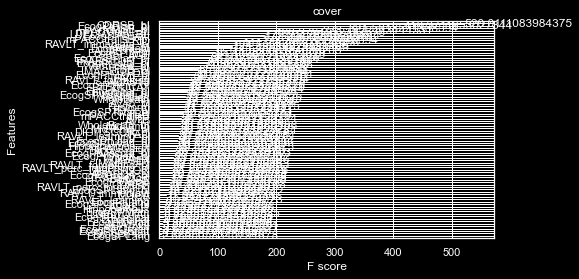

acc= 0.9959938366718027


In [74]:
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

def estimate(model,data):

    #sns.barplot(data.columns,model.feature_importances_)
    plt.figure(figsize=(15,45))
    ax1=plot_importance(model,importance_type="gain")
    ax1.set_title('gain')
    ax2=plot_importance(model, importance_type="weight")
    ax2.set_title('weight')
    ax3 = plot_importance(model, importance_type="cover")
    ax3.set_title('cover')
    plt.show()
def classes(data,label,test):
    model=XGBClassifier()
    model.fit(data,label)
    ans=model.predict(test)
    estimate(model, data)
    return ans
 
ans=classes(x_train,y_train,x_test)
pre=accuracy_score(y_test, ans)
print('acc=',accuracy_score(y_test,ans))

<AxesSubplot: >

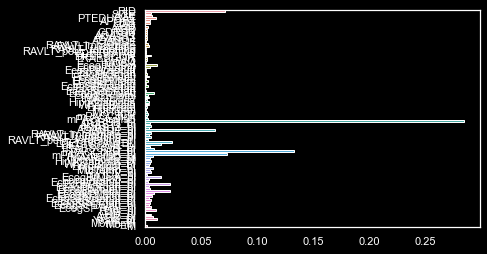

In [75]:
sns.barplot(y=data_features_part.columns, x=clf.feature_importances_)

In [76]:
# 网格调参
## 从sklearn库中导入网格调参函数
from sklearn.model_selection import GridSearchCV

## 定义参数取值范围
learning_rate = [0.1, 0.3, 0.6]
subsample = [0.8, 0.9]
colsample_bytree = [0.6, 0.8]
max_depth = [3,5,8]

parameters = { 'learning_rate': learning_rate,
              'subsample': subsample,
              'colsample_bytree':colsample_bytree,
              'max_depth': max_depth}
model = XGBClassifier(n_estimators = 50)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3, scoring='accuracy',verbose=1,n_jobs=-1)
clf = clf.fit(x_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [77]:
#最好的参数：
clf.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.3,
 'max_depth': 8,
 'subsample': 0.9}

The accuracy of the Logistic Regression is: 1.0
The accuracy of the Logistic Regression is: 0.9956856702619414
The confusion matrix result:
 [[   0    0    0    0]
 [   0  965    0    0]
 [   3    6 1921    5]
 [   0    0    0  345]]


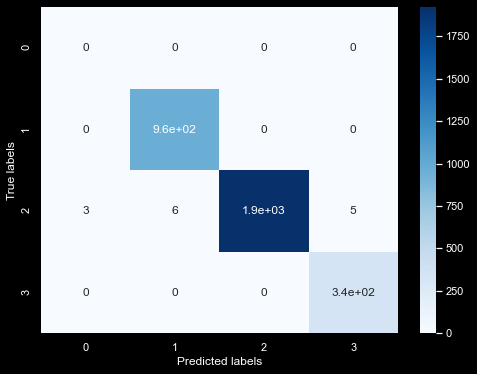

In [78]:
## 在训练集和测试集上分布利用最好的模型参数进行预测

## 定义带参数的 XGBoost模型 
clf = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.3, max_depth= 8, subsample = 0.9)
# 在训练集上训练XGBoost模型
clf.fit(x_train, y_train)

train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


<Figure size 2160x720 with 0 Axes>

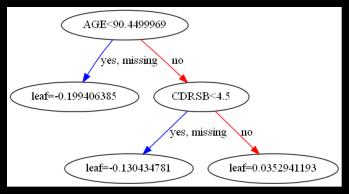

In [82]:
plt.figure(figsize=(30,10))
plot_tree(clf,fmap='', num_trees=0, rankdir='UT', ax=None)
plt.savefig(img_path+'/0.png',dpi=1000)
plt.show()

In [85]:
from sklearn.tree import DecisionTreeClassifier as dtc # 树算法
from sklearn.metrics import accuracy_score
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(x_train, y_train)
pred_model = model.predict(x_test)
print(accuracy_score(y_test, pred_model))


0.9402157164869029


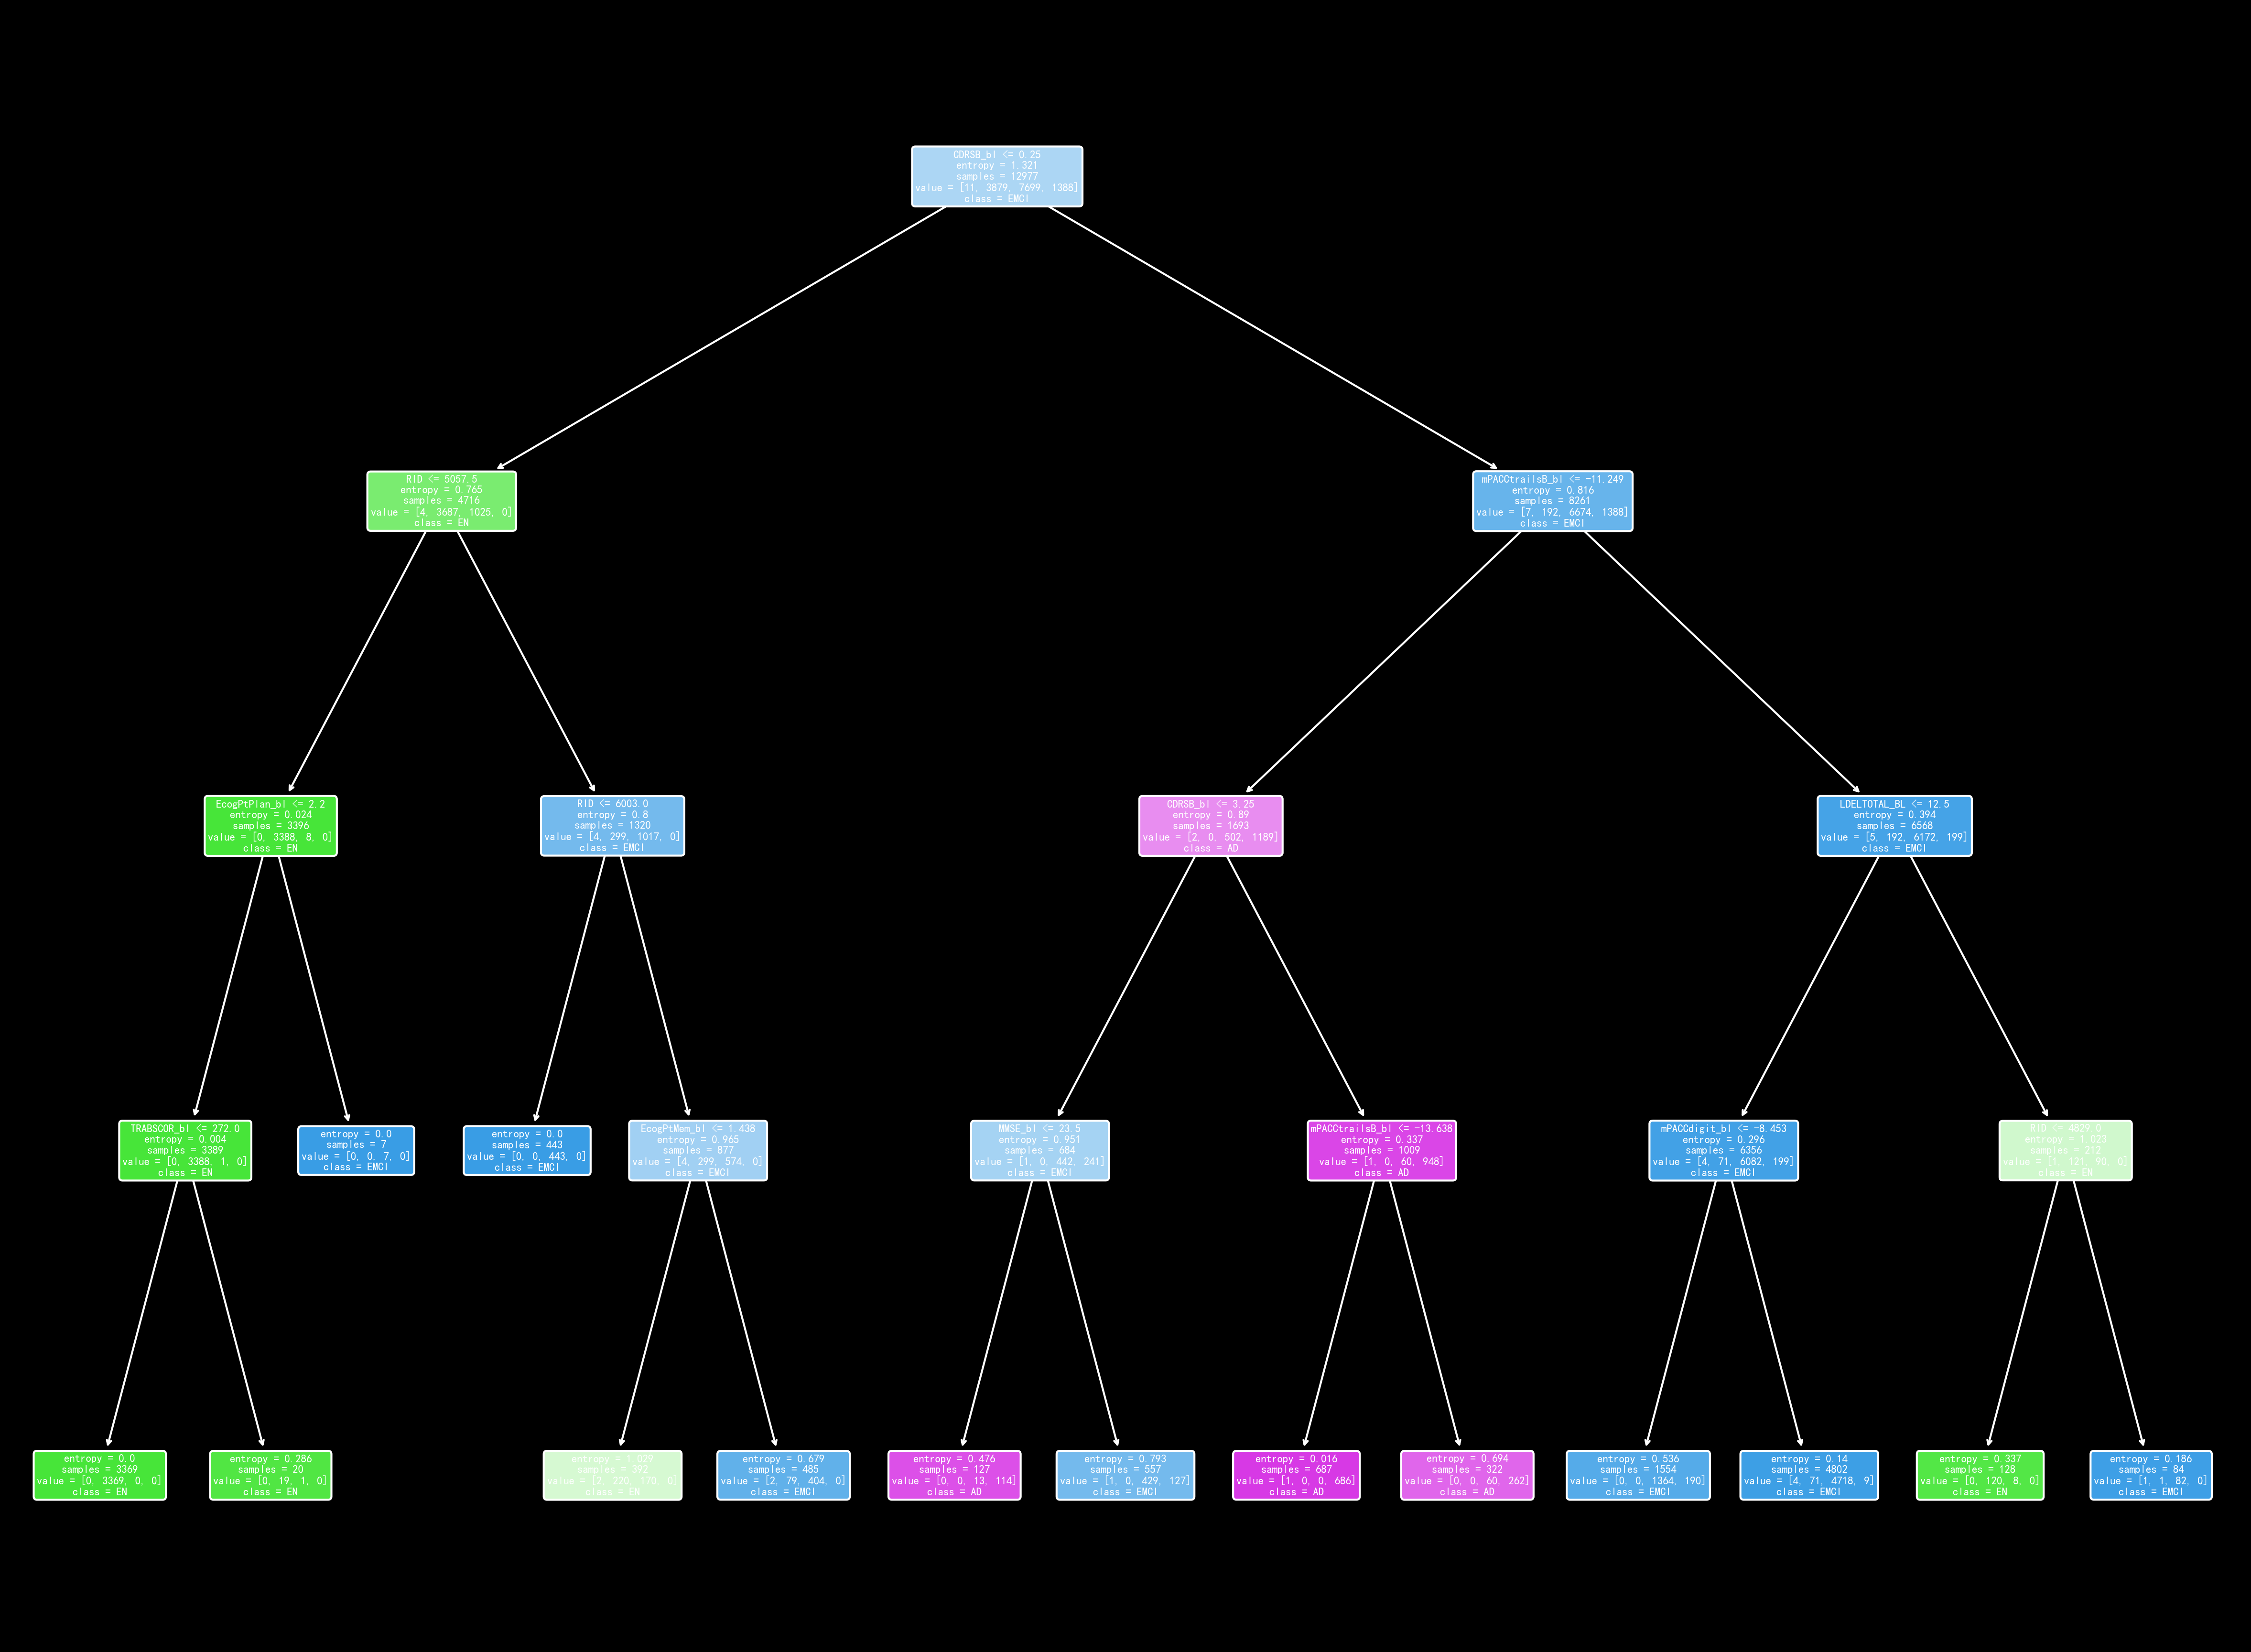

In [91]:

from sklearn.tree import plot_tree # 树图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']   #解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False    # 解决中文显示问题
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(x_train, y_train)
feature_names = x_train.columns
target_names = ['LMCI','EN','EMCI','AD','SMC']
plt.figure(figsize=(20,15),dpi=300)
plot_tree(model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)
 
plt.savefig(img_path+'/DecissionTreeViusalation.png')
plt.show()

In [ ]:
# 聚类

In [ ]:
data=pd.read_csv(data_path+"/ADNIMERGE_New.csv",low_memory=False)

In [97]:
data_SMC=data[data["DX_bl"]=="SMC"]
data_EMCI=data[data["DX_bl"]=="EMCI"]
data_LMCI=data[data["DX_bl"]=="LMCI"]

data_SMC.drop("DX_bl",axis=1,inplace=True)
data_EMCI.drop("DX_bl",axis=1,inplace=True)
data_LMCI.drop("DX_bl",axis=1,inplace=True)


In [113]:
data_SMC=data_SMC.fillna(0)
data_EMCI=data_EMCI.fillna(0)
data_LMCI=data_LMCI.fillna(0)

data_SMC=data_SMC.select_dtypes(exclude="object")
data_EMCI=data_EMCI.select_dtypes(exclude="object")
data_LMCI=data_LMCI.select_dtypes(exclude="object")


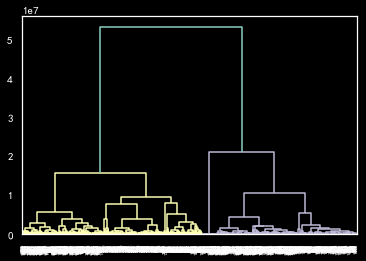

<Figure size 1440x432 with 0 Axes>

In [114]:
#根据手肘法 知道最佳值在k=3
from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
import matplotlib.pyplot as plt
k = 3
model = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
data =data_SMC
model.fit(data) #训练模型
# 详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)  #详细输出每个样本对应的类别
from scipy.cluster.hierarchy import linkage,dendrogram
#这里使用scipy的层次聚类函数
Z = linkage(data, method = 'ward', metric = 'euclidean') #谱系聚类图
P = dendrogram(Z, 0) #画谱系聚类图
# plt.xticks(rotation=30)
plt.figure(figsize=(20,6))
plt.savefig(img_path+'/SMC聚类.png',dpi=300)
plt.show()


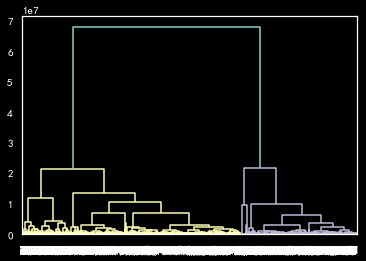

<Figure size 1440x432 with 0 Axes>

In [115]:
#根据手肘法 知道最佳值在k=3
from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
import matplotlib.pyplot as plt
k = 3
model = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
data =data_EMCI
model.fit(data) #训练模型
# 详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)  #详细输出每个样本对应的类别
from scipy.cluster.hierarchy import linkage,dendrogram
#这里使用scipy的层次聚类函数
Z = linkage(data, method = 'ward', metric = 'euclidean') #谱系聚类图
P = dendrogram(Z, 0) #画谱系聚类图
# plt.xticks(rotation=30)
plt.figure(figsize=(20,6))
plt.savefig(img_path+'/SMC聚类.png',dpi=300)
plt.show()


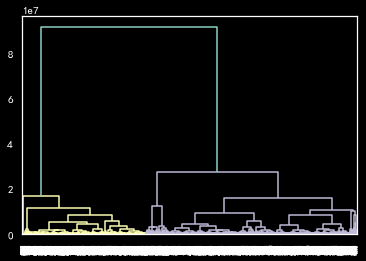

<Figure size 1440x432 with 0 Axes>

In [116]:
#根据手肘法 知道最佳值在k=3
from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
import matplotlib.pyplot as plt
k = 3
model = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
data =data_LMCI
model.fit(data) #训练模型
# 详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)  #详细输出每个样本对应的类别
from scipy.cluster.hierarchy import linkage,dendrogram
#这里使用scipy的层次聚类函数
Z = linkage(data, method = 'ward', metric = 'euclidean') #谱系聚类图
P = dendrogram(Z, 0) #画谱系聚类图
# plt.xticks(rotation=30)
plt.figure(figsize=(20,6))
plt.savefig(img_path+'/SMC聚类.png',dpi=300)
plt.show()


In [117]:
data_SMC['Class']=model.fit_predict(data_SMC)
data_EMCI['Class']=model.fit_predict(data_EMCI)
data_LMCI['Class']=model.fit_predict(data_LMCI)

In [118]:
print("data_SMC:",data_SMC['Class'].value_counts())
print("data_EMCI:",data_EMCI['Class'].value_counts())
print("data_LMCI:",data_LMCI['Class'].value_counts())

data_SMC: 0    759
1    592
2     65
Name: Class, dtype: int64
data_EMCI: 0    1931
1     971
2      66
Name: Class, dtype: int64
data_LMCI: 1    2933
0    1936
2     367
Name: Class, dtype: int64


In [122]:
data_SMC[data_SMC['Class']==0].to_csv(data_path+'/SMC_0.csv')
data_SMC[data_SMC['Class']==1].to_csv(data_path+'/SMC_1.csv')
data_SMC[data_SMC['Class']==2].to_csv(data_path+'/SMC_2.csv')
data_EMCI[data_EMCI['Class']==0].to_csv(data_path+'/EMCI_0.csv')
data_EMCI[data_EMCI['Class']==1].to_csv(data_path+'/EMCI_1.csv')
data_EMCI[data_EMCI['Class']==2].to_csv(data_path+'/EMCI_2.csv')
data_LMCI[data_LMCI['Class']==0].to_csv(data_path+'/LMCI_0.csv')
data_LMCI[data_LMCI['Class']==1].to_csv(data_path+'/LMCI_1.csv')
data_LMCI[data_LMCI['Class']==2].to_csv(data_path+'/LMCI_2.csv')